In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [5]:
movies.shape

(62423, 3)

In [6]:
ratings.shape

(25000095, 4)

In [7]:
ratings.groupby('userId')['rating'].count().sort_values(ascending=False)

userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
          ...  
12094        20
119539       20
156759       20
12084        20
36207        20
Name: rating, Length: 162541, dtype: int64

In [8]:
num_ratings = ratings.groupby('userId')['rating'].count().reset_index()

In [9]:
num_ratings.rename(columns={'rating': 'num_of_ratings'}, inplace=True)

In [10]:
ratings = ratings.merge(num_ratings, on='userId')

In [11]:
ratings.head()

,userId,movieId,rating,timestamp,num_of_ratings
0,1,296,5.0,1147880044,70
1,1,306,3.5,1147868817,70
2,1,307,5.0,1147868828,70
3,1,665,5.0,1147878820,70
4,1,899,3.5,1147868510,70


<Axes: >

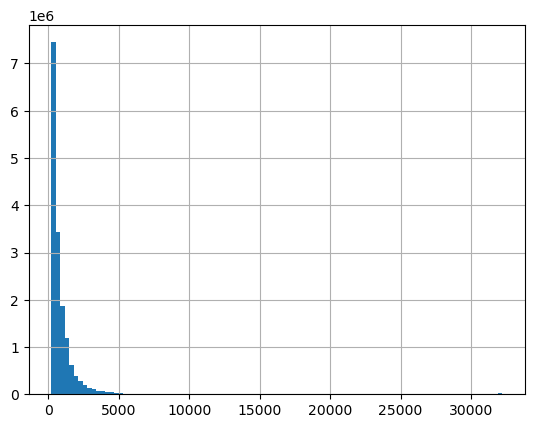

In [12]:
cond = ratings['num_of_ratings']>200
ratings[cond]['num_of_ratings'].hist(bins=100)

In [13]:
final_ratings = ratings[ratings['num_of_ratings']>200]
final_ratings.shape

(16063558, 5)

In [14]:
movie_ratings = final_ratings.groupby('movieId')['rating'].count().reset_index()
movie_ratings.rename(columns={'rating': 'num_movie_ratings'}, inplace=True)

In [15]:
final_ratings = final_ratings.merge(movie_ratings, on='movieId')

<Axes: >

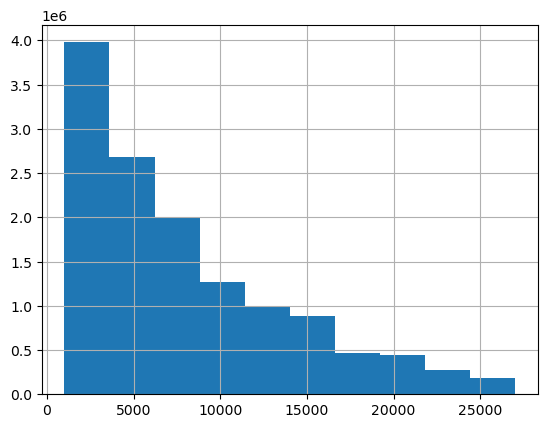

In [16]:
cond = final_ratings['num_movie_ratings'] > 1000
final_ratings[cond]['num_movie_ratings'].hist()

In [17]:
final_ratings = final_ratings[final_ratings['num_movie_ratings']>1000]
final_ratings.shape

(13186920, 6)

In [18]:
final_ratings = final_ratings.merge(movies, on='movieId')

In [19]:
final_ratings['genres'] = final_ratings['genres'].str.split('|')

In [20]:
final_ratings.head()

,userId,movieId,rating,timestamp,num_of_ratings,num_movie_ratings,title,genres
0,3,1,4.0,1439472215,656,22843,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,4,1,3.0,1573944252,242,22843,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,12,1,4.0,1167582601,736,22843,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,13,1,4.0,1265223970,412,22843,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,43,1,4.0,1170491388,420,22843,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"


In [21]:
final_ratings.shape

(13186920, 8)

In [22]:
final_ratings.drop_duplicates(['userId', 'title']).shape

(13186920, 8)

In [23]:
movies_pivot = pd.pivot_table(data=final_ratings, index='title', columns='userId', values='rating', fill_value=0)

In [24]:
movies_pivot.head()

userId,3,4,12,13,19,23,31,38,43,57,...,162507,162508,162512,162516,162519,162521,162524,162529,162533,162534
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",0.0,0.0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0
(500) Days of Summer (2009),0.0,0.0,3.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,2.5,0.0,4.0,0,0.0,0.0,0,0.0,0.0
*batteries not included (1987),0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,3.0,0,0.0,0.0,0,0.0,0.0
10 Cloverfield Lane (2016),0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,3.5,0,0.0,0.0,0,0.0,0.0
10 Things I Hate About You (1999),0.0,0.0,3.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0,3.0,5.0,3.5,0,0.0,3.0,0,2.5,0.0


In [25]:
movies_pivot.shape

(3263, 32848)

In [26]:
# pivot table have zeros, and it will be a problem for k-neighbors algoritm, because 
# this algorithm calculate distances and we should not consider zeros. 
# To do this we are using csr_matrix - Compressed Sparse Row matrix
# a sparse matrix is a matrix in which most of the elements are zero.

In [27]:
from scipy.sparse import csr_matrix

In [28]:
movies_sparse = csr_matrix(movies_pivot)

In [29]:
movies_sparse

<3263x32848 sparse matrix of type '<class 'numpy.float64'>'
	with 13186920 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.neighbors import NearestNeighbors

In [31]:
model = NearestNeighbors(algorithm='auto')

In [32]:
model.fit(movies_sparse)

NearestNeighbors()

In [33]:
# reshaping data into a 2D array for kneighbors algorithm.
distance, suggestion = model.kneighbors(movies_pivot.iloc[3, :].values.reshape(1, -1), n_neighbors=10)

In [34]:
distance

array([[  0.        , 177.14965425, 180.89085107, 181.89901044,
        182.5465694 , 184.96621313, 186.54088024, 186.89368636,
        188.58618719, 189.33370012]])

In [35]:
suggestion

array([[   3,  797, 1475, 1676, 2910,  113,  176, 2710,   58, 1473]],
      dtype=int64)

In [36]:
for i in suggestion:
    print(movies_pivot.index[i])

Index(['10 Cloverfield Lane (2016)', 'Don't Breathe (2016)',
       'It Follows (2014)', 'Life (2017)', 'The Witch (2015)',
       'Alien: Covenant (2017)', 'Annihilation (2018)', 'Split (2017)',
       'A Quiet Place (2018)', 'It (2017)'],
      dtype='object', name='title')


In [37]:
movies_names = movies_pivot.index

In [38]:
print(movies_names)

Index([''burbs, The (1989)', '(500) Days of Summer (2009)',
       '*batteries not included (1987)', '10 Cloverfield Lane (2016)',
       '10 Things I Hate About You (1999)', '10,000 BC (2008)',
       '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '102 Dalmatians (2000)', '12 Angry Men (1957)',
       ...
       'Zero Dark Thirty (2012)', 'Zero Effect (1998)', 'Zodiac (2007)',
       'Zombieland (2009)', 'Zoolander (2001)', 'Zootopia (2016)',
       '[REC] (2007)', 'eXistenZ (1999)', 'xXx (2002)',
       '¡Three Amigos! (1986)'],
      dtype='object', name='title', length=3263)


In [ ]:
import pickle
pickle.dump(movies_names, open('files/movies_names.pkl', 'wb'))
pickle.dump(movies_pivot, open('files/movies_pivot.pkl', 'wb'))
pickle.dump(final_ratings, open('files/final_ratings.pkl', 'wb'))